<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/Fish_YOLOWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Ensure the library is updated
!pip install -U ultralytics

import torch
from ultralytics import YOLOWorld
from google.colab.patches import cv2_imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [16]:
# 2. Load the model weights
# If you have them locally, it will use them; otherwise, it downloads them once.
model = YOLOWorld("yolov8s-worldv2.pt")


image 1/1 /content/tc1.png: 448x640 2 Bs, 1 a, 445.3ms
Speed: 3.3ms preprocess, 445.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


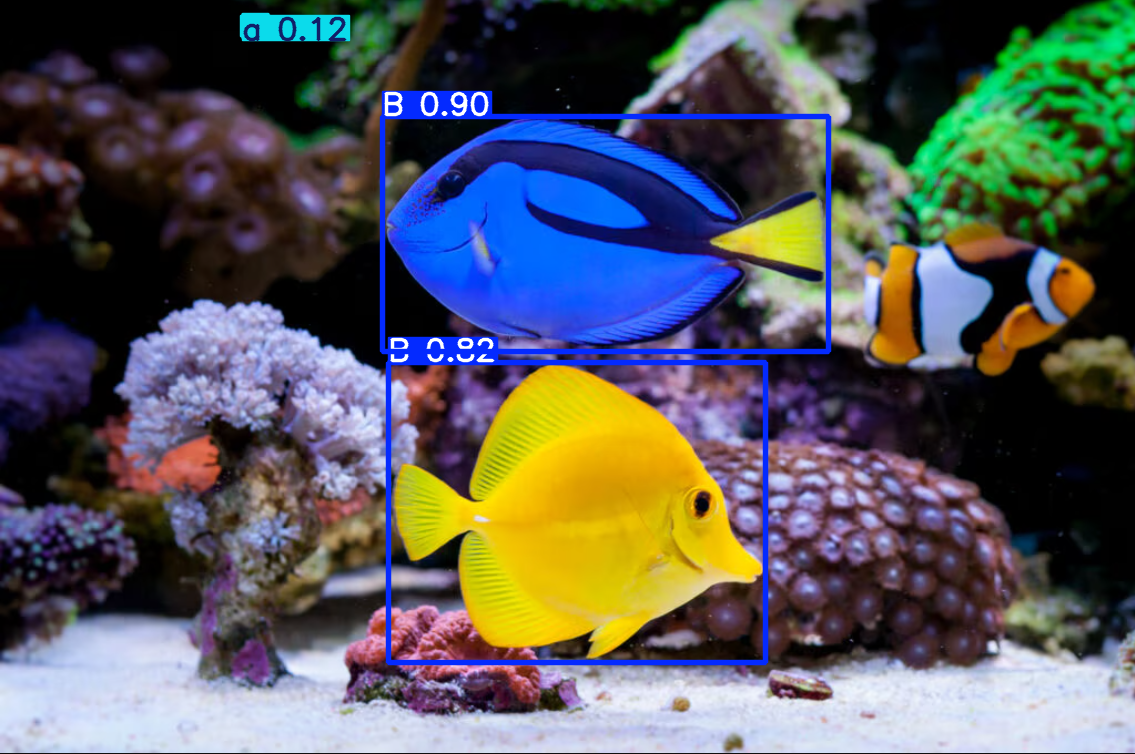

In [33]:
from ultralytics import YOLOWorld
import cv2
from google.colab.patches import cv2_imshow

model = YOLOWorld("yolov8s-worldv2.pt")

# FIX: Use equally detailed, contrasting prompts
# We add a 'Negative' class (background) to reduce false positives
model.set_classes([
    "royal blue tang fish with a black palette pattern and bright yellow tail",
    "solid bright neon yellow teardrop-shaped tang fish with no black markings",
    "orange and white striped clownfish",
    "aquarium rocks and coral background" # Negative prompt to soak up background noise
])

# Manually clean the display names again
model.model.names = "Blue Tang"
model.model.names = "Yellow Tang"
model.model.names = "Clownfish"
model.model.names = "Background"

# Run with a slightly higher IOU to prevent double-boxing
results = model.predict("tc1.png", conf=0.12, iou=0.3)

for r in results:
    # Filter out the 'Background' class so it doesn't show boxes on rocks
    # Class ID 3 is our background prompt
    r.boxes = r.boxes[r.boxes.cls != 3]
    cv2_imshow(r.plot())



image 1/1 /content/tc1.png: 448x640 2 blue tang fish with a black palette pattern and yellow tails, 716.6ms
Speed: 3.9ms preprocess, 716.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


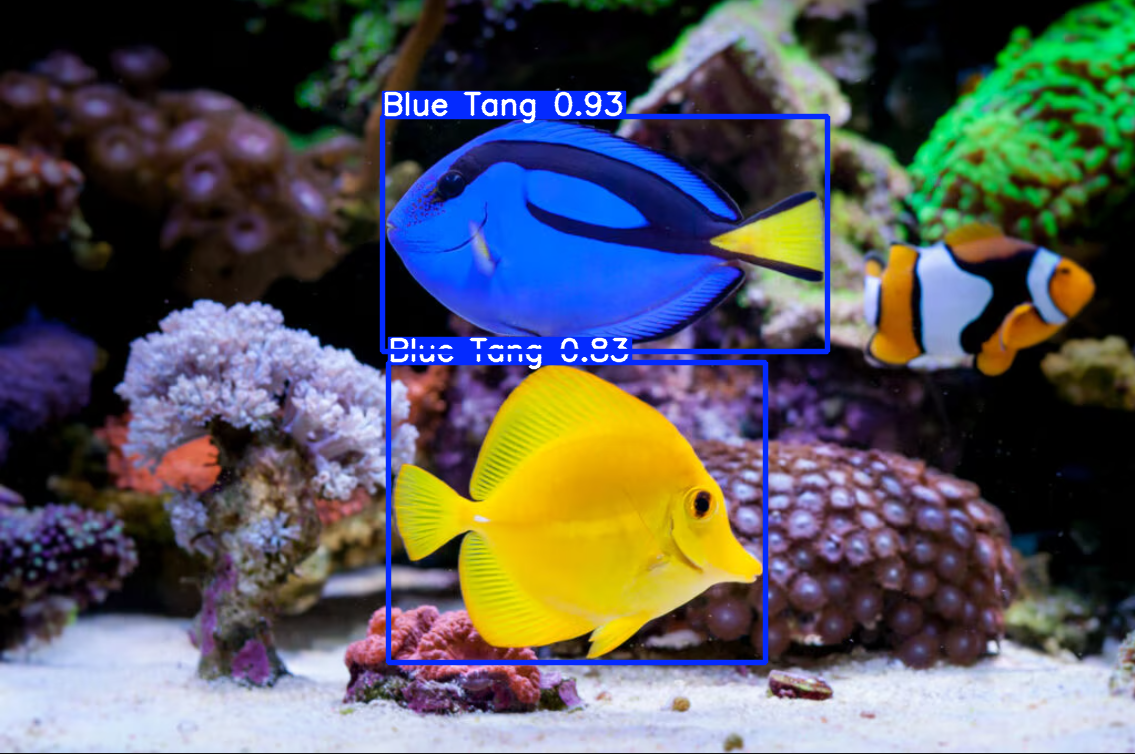

In [34]:
import torch
import numpy as np
from ultralytics import YOLOWorld
import cv2
from google.colab.patches import cv2_imshow

# 1. Load Model and Set Descriptive Classes
model = YOLOWorld("yolov8s-worldv2.pt")
model.set_classes([
    "blue tang fish with a black palette pattern and yellow tail",
    "solid bright yellow tang fish"
])

# 2. Run Prediction
results = model.predict("tc1.png", conf=0.08)

# 3. FIX: Manual Label Correction based on Bbox Color
for r in results:
    img = r.orig_img
    for i, box in enumerate(r.boxes):
        # Get coordinates of the detected fish
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        fish_crop = img[y1:y2, x1:x2]

        # Calculate average color in the box (BGR format)
        avg_color = np.mean(fish_crop, axis=(0, 1))

        # If the box is primarily yellow (High Red and Green, Low Blue)
        # We force the class ID to 1 (Yellow Tang)
        if avg_color[2] > 180 and avg_color[1] > 180 and avg_color[0] < 120:
            r.boxes.cls[i] = 1
        # If it is primarily blue, force to 0 (Blue Tang)
        elif avg_color[0] > 180:
            r.boxes.cls[i] = 0

    # Update names for clean display
    r.names = {0: "Blue Tang", 1: "Yellow Tang"}
    cv2_imshow(r.plot())



image 1/1 /content/tc1.png: 448x640 2 blue tang fish with a black palette pattern and yellow tails, 455.7ms
Speed: 3.3ms preprocess, 455.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


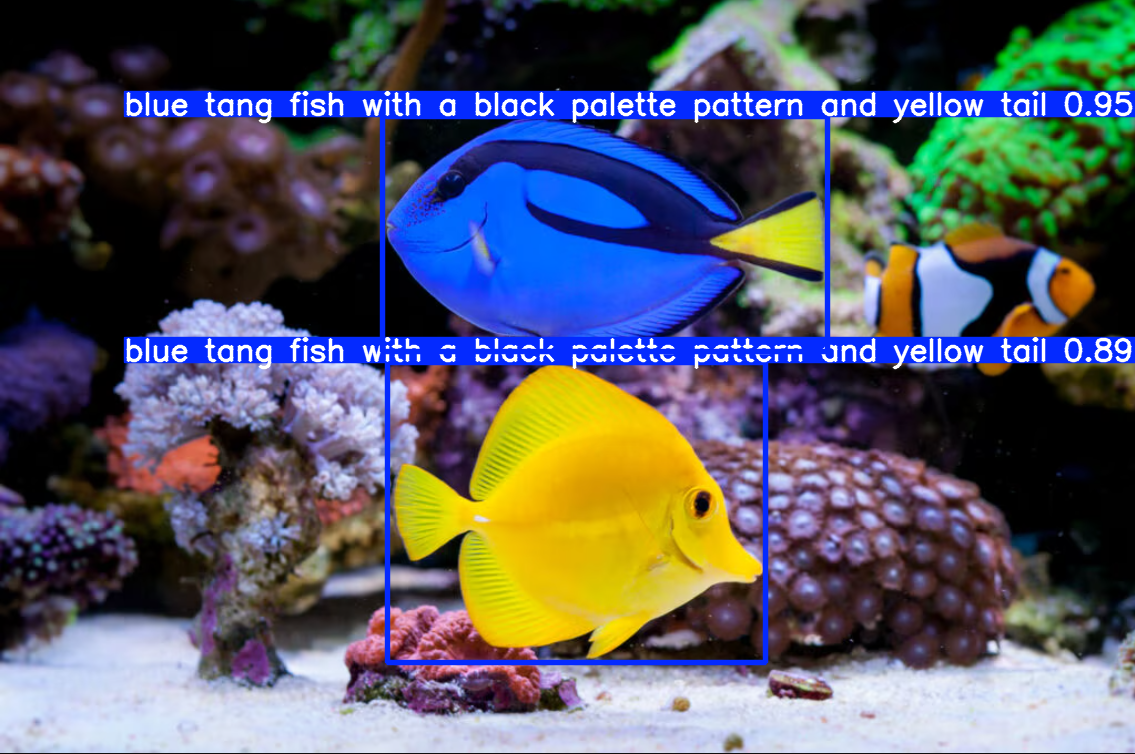

In [26]:
# 4. Run the prediction
# Use a low confidence (0.10) initially to find rare objects
results = model.predict(
    source="tc1.png",
    conf=0.05,
    iou=0.5,
    imgsz=640
)
# 5. Show the final result
for r in results:
    # This plots ONLY the 'mandarinfish' detections
    cv2_imshow(r.plot())


image 1/1 /content/tc2.jpg: 320x640 1 orange fish, 1 blue fish, 2 aquarium fishs, 334.9ms
Speed: 2.6ms preprocess, 334.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


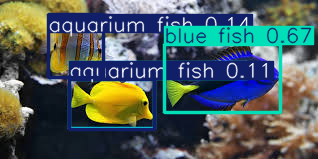

In [23]:
# 4. Run the prediction
# Use a low confidence (0.10) initially to find rare objects
results = model.predict(
    source="tc2.jpg",
    conf=0.05,
    iou=0.5,
    imgsz=640
)
# 5. Show the final result
for r in results:
    # This plots ONLY the 'mandarinfish' detections
    cv2_imshow(r.plot())


image 1/1 /content/tc3.jpg: 512x640 5 aquarium fishs, 492.9ms
Speed: 3.7ms preprocess, 492.9ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


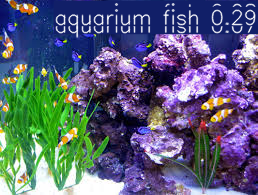

In [24]:
# 4. Run the prediction
# Use a low confidence (0.10) initially to find rare objects
results = model.predict(
    source="tc3.jpg",
    conf=0.05,
    iou=0.5,
    imgsz=640
)
# 5. Show the final result
for r in results:
    # This plots ONLY the 'mandarinfish' detections
    cv2_imshow(r.plot())